# <span style="color:#0f766e; font-weight:700;">Analiza Danych (Python) - Lekcja 2</span>

1. [Statystyka opisowa i praca z danymi](#1.-Statystyka-opisowa-i-praca-z-danymi)
2. [Typy danych i skale pomiarowe](#2.-Typy-danych-i-skale-pomiarowe)
3. [Miary tendencji centralnej i rozproszenia](#3.-Miary-tendencji-centralnej-i-rozproszenia)
4. [Wizualizacja rozkładów i zależności](#4.-Wizualizacja-rozkładów-i-zależności)
5. [Zadania](#5.-Zadania)
6. [Najczęstsze błędy](#Najczęstsze-błędy)


# <span style="color:#0f766e; font-weight:700;">1. Statystyka opisowa i praca z danymi</span>

## <span style="color:#0f766e; font-weight:700;">Populacja, próba, losowość</span>

- **Populacja**: pełny zbiór obiektów, o których chcemy wnioskować.
- **Próba**: część populacji, którą realnie obserwujemy.
- **Losowość**: mechanizm doboru i zmienności wyników; wpływa na to, czy wnioski da się uogólniać.

W praktyce analitycznej:
- pracujemy na próbie,
- opisujemy próbę statystykami opisowymi,
- oceniamy, na ile wynik może reprezentować populację.

## <span style="color:#0f766e; font-weight:700;">Cel tej lekcji</span>

- poprawnie opisać dane liczbowe i kategoryczne,
- rozumieć, które miary mają sens dla danej skali,
- tworzyć wykresy rozkładów i zależności,
- formułować krótkie, poprawne wnioski z danych.


# <span style="color:#0f766e; font-weight:700;">2. Typy danych i skale pomiarowe</span>

## <span style="color:#0f766e; font-weight:700;">Typy danych w pandas</span>

Najczęściej spotkasz:
- `object` / `string` (tekst),
- `int64`, `float64` (liczby),
- `category` (kategorie),
- `datetime64[ns]` (daty).

## <span style="color:#0f766e; font-weight:700;">Skale pomiarowe (statystyka)</span>

- **Nominalna**: kategorie bez porządku (np. płeć, grupa).
- **Porządkowa**: kategorie z porządkiem (np. skala Likerta 1-5).
- **Przedziałowa**: różnice mają sens, brak naturalnego zera.
- **Ilorazowa**: różnice i ilorazy mają sens, istnieje zero absolutne.

Zasada praktyczna: najpierw ustal skalę zmiennej, dopiero potem dobieraj miary i wykres.


# <span style="color:#0f766e; font-weight:700;">3. Miary tendencji centralnej i rozproszenia</span>

## <span style="color:#0f766e; font-weight:700;">Najważniejsze miary</span>

- Tendencja centralna: `mean`, `median`, `mode`.
- Rozproszenie: `std`, `var`, `min`, `max`, `quantile`, `IQR`.
- Rozkład empiryczny: jak często obserwujemy wartości (histogram, gęstość, percentyle).

W praktyce:
- dla rozkładów skośnych częściej raportujemy medianę i IQR,
- dla rozkładów zbliżonych do normalnych często raportujemy średnią i odchylenie standardowe.


# <span style="color:#0f766e; font-weight:700;">4. Wizualizacja rozkładów i zależności</span>

## <span style="color:#0f766e; font-weight:700;">Minimalny zestaw wykresów</span>

- histogram + KDE: rozkład jednej zmiennej liczbowej,
- boxplot: porównanie rozkładów między grupami + obserwacje odstające,
- barplot/countplot: zmienne kategoryczne,
- scatterplot: zależność między dwiema zmiennymi liczbowymi.

Dobra praktyka:
- zawsze podpisane osie,
- tytuł mówiący, co porównujesz,
- krótki komentarz interpretacyjny pod wykresem.


# <span style="color:#0f766e; font-weight:700;">5. Zadania</span>

## <span style="color:#0f766e; font-weight:700;">Pliki do ćwiczeń</span>

Pliki wejściowe znajdują się w folderze `dane_lekcja2/`:

- `participants.csv` (800 wierszy)
- `survey_likert.csv` (700 wierszy)
- `experiment_trials.csv` (1000 wierszy)
- `outliers_rt.csv` (500 wierszy)


## <span style="color:#0f766e; font-weight:700;">Zadanie 1</span>

Cel: szybka diagnostyka jakości danych i struktury tabeli.

Wprowadzenie:
Najpierw zawsze sprawdź rozmiar danych, typy kolumn i braki. To pozwala uniknąć błędnych analiz na kolejnych etapach.

Instrukcja:
1. Wczytaj `participants.csv`.
2. Sprawdź liczbę wierszy i kolumn.
3. Sprawdź typy kolumn.
4. Policz braki danych w każdej kolumnie.

Wymagane funkcje:
- `pd.read_csv()`
- `DataFrame.shape`
- `DataFrame.info()`
- `DataFrame.isna()`
- `DataFrame.sum()`

Kryterium zaliczenia:
- pokazany rozmiar danych, typy i liczba braków.

Checkpoint:
- pokaż prowadzącemu wynik `df.info()` i `df.isna().sum()`.

Dokumentacja:
- https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html


In [ ]:
import pandas as pd

df = pd.read_csv("dane_lekcja2/participants.csv")
print(df.shape, "\n")
print(df.dtypes, "\n")
print(df.isna().sum())


(800, 12) 

participant_id        int64
age                   int64
gender                  str
group                   str
education               str
sleep_hours         float64
stress_level        float64
reaction_time_ms    float64
memory_score        float64
attention_score     float64
session_date            str
city                    str
dtype: object 

participant_id       0
age                  0
gender               0
group                0
education            0
sleep_hours         23
stress_level        14
reaction_time_ms     0
memory_score        14
attention_score      0
session_date         0
city                 0
dtype: int64


## <span style="color:#0f766e; font-weight:700;">Zadanie 2</span>

Cel: rozpoznanie typów danych i skal pomiarowych.

Wprowadzenie:
Typ techniczny (`dtype`) i skala statystyczna to nie to samo. Np. skala Likerta jest zwykle liczbowo zapisana jako `int`, ale statystycznie jest porządkowa.

Instrukcja:
1. Dla każdej kolumny z `participants.csv` zapisz proponowaną skalę: nominalna/porządkowa/ilorazowa.
2. Utwórz tabelę podsumowującą z kolumnami: `zmienna`, `dtype`, `skala`, `uzasadnienie`.

Wymagane funkcje:
- `DataFrame.dtypes`
- `pd.DataFrame()`

Kryterium zaliczenia:
- tabela zawiera wszystkie kolumny i sensowne przypisanie skali.

Checkpoint:
- pokaż gotową tabelę klasyfikacji zmiennych.

Dokumentacja:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html


In [ ]:
# Zadanie 2 – typy danych i skale pomiarowe

import pandas as pd

df = pd.read_csv("dane_lekcja2/participants.csv")

# Pobierz dtype każdej kolumny jako słownik
dtypes = df.dtypes.astype(str).to_dict()

# Definicja tabeli klasyfikacji
klasyfikacja = [
    {
        "zmienna": "participant_id",
        "dtype": dtypes["participant_id"],
        "skala": "nominalna",
        "uzasadnienie": "Identyfikator liczbowy - liczby służą jako etykiety, nie mają sensu matematycznego (np. iloraz ID nie ma znaczenia).",
    },
    {
        "zmienna": "age",
        "dtype": dtypes["age"],
        "skala": "ilorazowa",
        "uzasadnienie": "Wiek w latach; istnieje zero absolutne (narodziny), różnice i ilorazy są sensowne (30 lat = 2 * 15 lat).",
    },
    {
        "zmienna": "gender",
        "dtype": dtypes["gender"],
        "skala": "nominalna",
        "uzasadnienie": "Kategorie M/K bez naturalnego porządku - nie można ich uszeregować.",
    },
    {
        "zmienna": "group",
        "dtype": dtypes["group"],
        "skala": "nominalna",
        "uzasadnienie": "Przynależność do grupy (kontrolna/eksperymentalna); brak porządku między kategoriami.",
    },
    {
        "zmienna": "education",
        "dtype": dtypes["education"],
        "skala": "porządkowa",
        "uzasadnienie": "Poziomy wykształcenia mają naturalny porządek (srednie < licencjat < magister < doktorat), ale odstępy między nimi nie są równe.",
    },
    {
        "zmienna": "sleep_hours",
        "dtype": dtypes["sleep_hours"],
        "skala": "ilorazowa",
        "uzasadnienie": "Godziny snu; istnieje zero absolutne (brak snu), ilorazy są sensowne (8h = 2 * 4h).",
    },
    {
        "zmienna": "stress_level",
        "dtype": dtypes["stress_level"],
        "skala": "porządkowa",
        "uzasadnienie": "Subiektywna skala 1 - 10; wiadomo, że 7 > 5, lecz nie można zakładać równych odstępów między wartościami. dtype=float64 ze względu na braki (NaN).",
    },
    {
        "zmienna": "reaction_time_ms",
        "dtype": dtypes["reaction_time_ms"],
        "skala": "ilorazowa",
        "uzasadnienie": "Czas reakcji w milisekundach; istnieje zero absolutne, ilorazy mają sens (400 ms = 2 * 200 ms).",
    },
    {
        "zmienna": "memory_score",
        "dtype": dtypes["memory_score"],
        "skala": "ilorazowa",
        "uzasadnienie": "Wynik testu pamięci na skali 0 - 100; 0 oznacza brak poprawnych odpowiedzi (zero absolutne), ilorazy interpretowalne.",
    },
    {
        "zmienna": "attention_score",
        "dtype": dtypes["attention_score"],
        "skala": "ilorazowa",
        "uzasadnienie": "Wynik testu uwagi na skali 0 - 100; analogicznie do memory_score - istnieje zero absolutne.",
    },
    {
        "zmienna": "session_date",
        "dtype": dtypes["session_date"],
        "skala": "porządkowa",
        "uzasadnienie": "Daty mają naturalny porządek (wcześniej/później), ale brak sensownego zera absolutnego - ilorazy dat nie mają znaczenia.",
    },
    {
        "zmienna": "city",
        "dtype": dtypes["city"],
        "skala": "nominalna",
        "uzasadnienie": "Nazwy miast - kategorie bez porządku; nie istnieje relacja 'większy/mniejszy'.",
    },
]




tabela = pd.DataFrame(klasyfikacja)
tabela


,zmienna,dtype,skala,uzasadnienie
0,participant_id,int64,nominalna,Identyfikator liczbowy - liczby służą jako ety...
1,age,int64,ilorazowa,Wiek w latach; istnieje zero absolutne (narodz...
2,gender,str,nominalna,Kategorie M/K bez naturalnego porządku - nie m...
3,group,str,nominalna,Przynależność do grupy (kontrolna/eksperymenta...
4,education,str,porządkowa,Poziomy wykształcenia mają naturalny porządek ...
5,sleep_hours,float64,ilorazowa,Godziny snu; istnieje zero absolutne (brak snu...
6,stress_level,float64,porządkowa,"Subiektywna skala 1 - 10; wiadomo, że 7 > 5, l..."
7,reaction_time_ms,float64,ilorazowa,Czas reakcji w milisekundach; istnieje zero ab...
8,memory_score,float64,ilorazowa,Wynik testu pamięci na skali 0 - 100; 0 oznacz...
9,attention_score,float64,ilorazowa,Wynik testu uwagi na skali 0 - 100; analogiczn...


## <span style="color:#0f766e; font-weight:700;">Zadanie 3</span>

Cel: obliczenie miar tendencji centralnej i rozproszenia.

Wprowadzenie:
Opis statystyczny powinien zawierać zarówno miary centralne, jak i rozproszenie. Sama średnia nie wystarcza.

Instrukcja:
1. Dla zmiennych `reaction_time_ms`, `memory_score`, `attention_score` oblicz:
- średnią,
- medianę,
- dominantę,
- odchylenie standardowe,
- kwartyle (`Q1`, `Q3`) i `IQR`.
2. Zbierz wynik do jednej tabeli.

Wymagane funkcje:
- `DataFrame.mean()`
- `DataFrame.median()`
- `DataFrame.mode()`
- `DataFrame.std()`
- `DataFrame.quantile()`

Kryterium zaliczenia:
- jedna tabela z kompletem miar dla trzech zmiennych.

Checkpoint:
- pokaż tabelę i krótko wskaż, która zmienna ma największe rozproszenie.

Dokumentacja:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html


In [75]:
# Zadanie 3 – miary tendencji centralnej i rozproszenia

zmienne = ["reaction_time_ms", "memory_score", "attention_score"]

wyniki = []

for zmienna in zmienne:

    col = df[zmienna]

    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    
    wyniki.append({
        "zmienna": zmienna,
        "średnia": col.mean(),
        "mediana": col.median(),
        "dominanta": col.mode()[0],
        "std": col.std(),
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
    })

tabela_miar = pd.DataFrame(wyniki).set_index("zmienna").round(2)
print(tabela_miar["std"].idxmax(), tabela_miar["std"].max()) 
tabela_miar



reaction_time_ms 84.92


,średnia,mediana,dominanta,std,Q1,Q3,IQR
zmienna,,,,,,,
reaction_time_ms,546.83,542.95,537.8,84.92,488.88,604.40,115.52
memory_score,69.15,69.20,63.2,11.87,61.30,77.60,16.30
attention_score,67.60,68.20,67.8,11.75,59.70,75.32,15.62


## <span style="color:#0f766e; font-weight:700;">Zadanie 4</span>

Cel: analiza rozkładu empirycznego jednej zmiennej.

Wprowadzenie:
Rozkład empiryczny pokazuje, gdzie koncentrują się obserwacje i czy występuje skośność.

Instrukcja:
1. Dla `reaction_time_ms` narysuj histogram (`bins` min. 20) i linię KDE.
2. Oblicz percentyle: 10%, 25%, 50%, 75%, 90%.
3. Napisz 2-3 zdania interpretacji.

Wymagane funkcje:
- `sns.histplot()`
- parametry `bins`, `kde`
- `Series.quantile()`
- `plt.title()`, `plt.xlabel()`, `plt.ylabel()`

Kryterium zaliczenia:
- poprawny wykres + percentyle + krótka interpretacja.

Checkpoint:
- pokaż wykres i wartości percentyli.

Dokumentacja:
- https://seaborn.pydata.org/generated/seaborn.histplot.html
- https://pandas.pydata.org/docs/reference/api/pandas.Series.quantile.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html


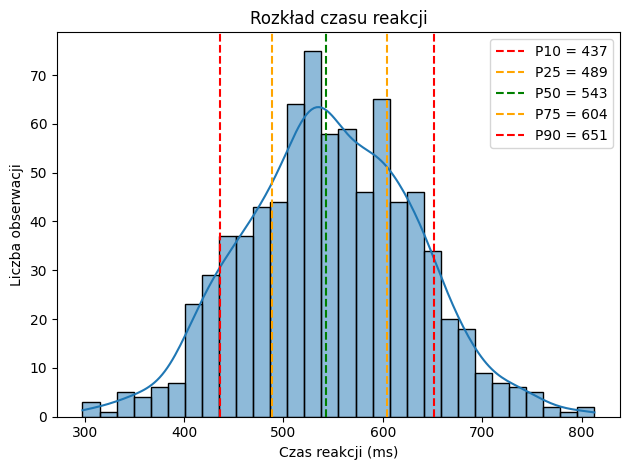

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

col = df["reaction_time_ms"]

fig, ax = plt.subplots()

sns.histplot(col, kde=True, bins=30, ax=ax)
ax.set_title("Histogram czasu reakcji")
ax.set_xlabel("Czas reakcji (ms)")
ax.set_ylabel("Częstość")

percentyle = [0.10, 0.25, 0.50, 0.75, 0.90]
kolory = ["red", "orange", "green", "orange", "red"]

for p, kolor in zip(percentyle, kolory):
    wartość = col.quantile(p)
    ax.axvline(wartość, color=kolor, linestyle="--", label=f"P{int(p*100)} = {wartość:.0f}")

ax.set_title("Rozkład czasu reakcji")
ax.set_xlabel("Czas reakcji (ms)")
ax.set_ylabel("Liczba obserwacji")
ax.legend()  # ← to jest wymagane, żeby labele axvline były widoczne

plt.tight_layout()
plt.show()

## <span style="color:#0f766e; font-weight:700;">Zadanie 5</span>

Cel: porównanie grup przy użyciu statystyki opisowej.

Wprowadzenie:
`groupby` pozwala porównać profile grup bez budowy modeli inferencyjnych.

Instrukcja:
1. Policz średni i medianowy `reaction_time_ms` oraz `memory_score` w podziale na `group`.
2. Rozszerz analizę o podział jednocześnie po `group` i `gender`.

Wymagane funkcje:
- `DataFrame.groupby()`
- `DataFrame.agg()`

Kryterium zaliczenia:
- dwie tabele: (a) wg `group`, (b) wg `group` i `gender`.

Checkpoint:
- wskaż, która grupa ma szybszy średni czas reakcji.

Dokumentacja:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
- https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.agg.html


In [90]:
# Zadanie 5 – porównanie grup

# (a) podział wg group
tabela_group = df.groupby("group")[["reaction_time_ms", "memory_score"]].agg(["mean", "median"]).round(2)
print("Tabela (a): wg group")
print(tabela_group, "\n")

# (b) podział wg group i gender
tabela_group_gender = df.groupby(["group", "gender"])[["reaction_time_ms", "memory_score"]].agg(["mean", "median"]).round(2)
print("Tabela (b): wg group i gender")
print(tabela_group_gender, "\n")

# Checkpoint – która grupa ma szybszy (niższy) średni czas reakcji?
srednie_rt = df.groupby("group")["reaction_time_ms"].mean()
najszybsza = srednie_rt.idxmin()
print(f"Najszybsza grupa (najniższy średni czas reakcji): {najszybsza} ({srednie_rt[najszybsza]:.2f} ms)")

Tabela (a): wg group
                reaction_time_ms         memory_score       
                            mean  median         mean median
group                                                       
eksperymentalna           534.77  533.45        69.39  70.00
kontrolna                 558.88  563.95        68.91  67.95 

Tabela (b): wg group i gender
                       reaction_time_ms        memory_score       
                                   mean median         mean median
group           gender                                            
eksperymentalna K                531.70  532.6        67.66  69.05
                M                538.01  537.6        71.24  71.15
kontrolna       K                558.72  564.2        69.11  67.80
                M                559.03  563.7        68.73  68.20 

Najszybsza grupa (najniższy średni czas reakcji): eksperymentalna (534.77 ms)


## <span style="color:#0f766e; font-weight:700;">Zadanie 6</span>

Cel: wizualizacja zależności między zmiennymi liczbowymi.

Wprowadzenie:
Na tym etapie nie testujemy hipotez, tylko opisujemy siłę i kierunek zależności.

Instrukcja:
1. Oblicz macierz korelacji dla zmiennych liczbowych z `participants.csv`.
2. Narysuj heatmapę korelacji.
3. Narysuj `scatterplot` dla `sleep_hours` vs `memory_score`.

Wymagane funkcje:
- `DataFrame.corr()`
- `sns.heatmap()`
- `sns.scatterplot()`
- parametr `annot=True` (heatmap)

Kryterium zaliczenia:
- macierz korelacji + 2 wykresy (heatmap + scatterplot).

Checkpoint:
- wskaż jedną dodatnią i jedną ujemną zależność.

Dokumentacja:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
- https://seaborn.pydata.org/generated/seaborn.heatmap.html
- https://seaborn.pydata.org/generated/seaborn.scatterplot.html


In [ ]:
# tutaj dodaj swój kod


## <span style="color:#0f766e; font-weight:700;">Zadanie 7</span>

Cel: detekcja obserwacji odstających.

Wprowadzenie:
Outliery silnie wpływają na średnią i odchylenie standardowe, dlatego warto je diagnozować osobno.

Instrukcja:
1. Wczytaj `outliers_rt.csv`.
2. Dla `rt_ms` oblicz `Q1`, `Q3`, `IQR`.
3. Wyznacz dolną i górną granicę metody IQR (`Q1 - 1.5*IQR`, `Q3 + 1.5*IQR`).
4. Odfiltruj obserwacje odstające i policz ich liczbę.
5. Pokaż boxplot `rt_ms` w podziale na `group`.

Wymagane funkcje:
- `Series.quantile()`
- filtrowanie logiczne `DataFrame`
- `sns.boxplot()`

Kryterium zaliczenia:
- podane granice IQR, liczba outlierów i wykres boxplot.

Checkpoint:
- pokaż tabelę z pierwszymi 10 outlierami.

Dokumentacja:
- https://pandas.pydata.org/docs/reference/api/pandas.Series.quantile.html
- https://seaborn.pydata.org/generated/seaborn.boxplot.html


In [ ]:
# tutaj dodaj swój kod


## <span style="color:#0f766e; font-weight:700;">Zadanie 8</span>

Cel: połączenie opisu liczbowego i wizualnego w krótkim raporcie.

Wprowadzenie:
To mini-symulacja realnej pracy analitycznej: wybierasz kluczowe miary i wykresy, a potem formułujesz wnioski.

Instrukcja:
1. Użyj `participants.csv` i przygotuj 1 tabelę podsumowującą (min. 4 miary).
2. Dodaj 2 wykresy: jeden rozkładu, jeden zależności.
3. Napisz 5 krótkich wniosków (każdy 1 zdanie) opartych na danych.

Wymagane funkcje:
- dowolne z poprzednich zadań (`describe`, `groupby`, `histplot`, `boxplot`, `scatterplot`, `heatmap`).

Kryterium zaliczenia:
- tabela + 2 wykresy + 5 wniosków spójnych z wynikami.

Checkpoint:
- przedstaw mini-raport w jednej sekcji notebooka.

Dokumentacja:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
- https://seaborn.pydata.org/


In [ ]:
# tutaj dodaj swój kod


## <span style="color:#0f766e; font-weight:700;">Zadanie 9</span>

Cel: praca na skali porządkowej (Likert) i świadomy dobór miar.

Wprowadzenie:
Dane Likerta są porządkowe, więc poza średnią warto raportować medianę i rozkład odpowiedzi.

Instrukcja:
1. Wczytaj `survey_likert.csv`.
2. Dla pytań `q1`-`q8` oblicz medianę i dominantę.
3. Dla każdego pytania policz rozkład odpowiedzi (`value_counts`) i udział procentowy.

Wymagane funkcje:
- `pd.read_csv()`
- `DataFrame.median()`
- `DataFrame.mode()`
- `Series.value_counts()`
- parametr `normalize=True`

Kryterium zaliczenia:
- tabela median i dominant + min. jedna tabela rozkładu procentowego.

Checkpoint:
- wskaż pytanie z najwyższą medianą.

Dokumentacja:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html
- https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html


In [ ]:
# tutaj dodaj swój kod


## <span style="color:#0f766e; font-weight:700;">Zadanie 10</span>

Cel: porównanie rozkładów między warunkami eksperymentalnymi.

Wprowadzenie:
Same średnie nie pokazują pełnego obrazu. Rozkład może różnić się szerokością i skośnością.

Instrukcja:
1. Wczytaj `experiment_trials.csv`.
2. Narysuj boxplot `rt_ms` w podziale na `condition`.
3. Dla każdej `condition` policz medianę i IQR dla `rt_ms`.

Wymagane funkcje:
- `pd.read_csv()`
- `sns.boxplot()`
- `groupby()` + `agg()`
- `quantile()`

Kryterium zaliczenia:
- wykres + tabela mediany i IQR dla A/B/C.

Checkpoint:
- wskaż warunek o największym rozproszeniu.

Dokumentacja:
- https://seaborn.pydata.org/generated/seaborn.boxplot.html
- https://pandas.pydata.org/docs/reference/api/pandas.Series.quantile.html


In [ ]:
# tutaj dodaj swój kod


## <span style="color:#0f766e; font-weight:700;">Zadanie 11</span>

Cel: analiza trafności odpowiedzi (`correct`) względem trudności zadania.

Wprowadzenie:
To przykład statystyki opisowej dla zmiennej binarnej (0/1): średnia = odsetek sukcesu.

Instrukcja:
1. W `experiment_trials.csv` policz odsetek poprawnych odpowiedzi dla poziomów `difficulty`.
2. Zwizualizuj wynik na wykresie słupkowym.
3. Dodaj etykiety procentowe nad słupkami.

Wymagane funkcje:
- `groupby()` + `mean()`
- `sns.barplot()` albo `plt.bar()`
- `matplotlib` (`plt.text` lub `bar_label`)

Kryterium zaliczenia:
- poprawny ranking poziomów trudności wg accuracy.

Checkpoint:
- wskaż różnicę (w p.p.) między `easy` i `hard`.

Dokumentacja:
- https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.SeriesGroupBy.mean.html
- https://seaborn.pydata.org/generated/seaborn.barplot.html


In [ ]:
# tutaj dodaj swój kod


## <span style="color:#0f766e; font-weight:700;">Zadanie 12</span>

Cel: standaryzacja (z-score) i porównanie obserwacji na wspólnej skali.

Wprowadzenie:
Standaryzacja umożliwia porównywanie zmiennych mierzonych w różnych jednostkach.

Instrukcja:
1. W `participants.csv` wylicz z-score dla `reaction_time_ms` i `memory_score`.
2. Dodaj kolumny `rt_z` i `memory_z`.
3. Sprawdź, ilu uczestników ma `rt_z > 2` lub `rt_z < -2`.

Wymagane funkcje:
- operacje wektorowe na kolumnach
- `Series.mean()`
- `Series.std()`
- filtrowanie logiczne

Kryterium zaliczenia:
- poprawnie utworzone kolumny z-score i liczba skrajnych obserwacji.

Checkpoint:
- pokaż 10 rekordów o najwyższym `rt_z`.

Dokumentacja:
- https://pandas.pydata.org/docs/reference/api/pandas.Series.mean.html
- https://pandas.pydata.org/docs/reference/api/pandas.Series.std.html


In [ ]:
# tutaj dodaj swój kod


## <span style="color:#0f766e; font-weight:700;">Zadanie 13</span>

Cel: praca z przedziałami wartości (binning).

Wprowadzenie:
Binning upraszcza interpretację i pozwala porównywać profile grup.

Instrukcja:
1. Podziel `age` na przedziały: `18-22`, `23-27`, `28-32`, `33+`.
2. Policz liczebność uczestników w każdym przedziale.
3. Porównaj średni `memory_score` między przedziałami wieku.

Wymagane funkcje:
- `pd.cut()`
- `Series.value_counts()`
- `groupby()` + `mean()`

Kryterium zaliczenia:
- poprawna kolumna przedziałów wieku i tabela porównawcza.

Checkpoint:
- wskaż przedział wieku z najwyższym średnim `memory_score`.

Dokumentacja:
- https://pandas.pydata.org/docs/reference/api/pandas.cut.html
- https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html


In [ ]:
# tutaj dodaj swój kod


## <span style="color:#0f766e; font-weight:700;">Zadanie 14</span>

Cel: porównanie średniej i mediany przy obecności obserwacji odstających.

Wprowadzenie:
Outliery mogą silnie przesuwać średnią, ale zwykle mniej wpływają na medianę.

Instrukcja:
1. Użyj `outliers_rt.csv`.
2. Policz średnią i medianę `rt_ms` dla całego zbioru.
3. Usuń outliery metodą IQR.
4. Ponownie policz średnią i medianę po oczyszczeniu.
5. Porównaj wyniki w krótkim komentarzu.

Wymagane funkcje:
- `mean()`, `median()`
- `quantile()`
- filtrowanie DataFrame

Kryterium zaliczenia:
- tabela/przedstawienie wyników „przed” i „po” oczyszczeniu.

Checkpoint:
- wskaż, która miara zmieniła się bardziej.

Dokumentacja:
- https://pandas.pydata.org/docs/reference/api/pandas.Series.mean.html
- https://pandas.pydata.org/docs/reference/api/pandas.Series.median.html
- https://pandas.pydata.org/docs/reference/api/pandas.Series.quantile.html


In [ ]:
# tutaj dodaj swój kod


## <span style="color:#0f766e; font-weight:700;">Zadanie 15</span>

Cel: mini-dashboard analityczny podsumowujący dane z lekcji.

Wprowadzenie:
Końcowe zadanie integruje całą lekcję: dane, statystyki opisowe i wizualizacje w jednym spójnym raporcie.

Instrukcja:
1. Przygotuj sekcję podsumowania na podstawie `participants.csv` i `experiment_trials.csv`.
2. Umieść:
- 1 tabelę statystyk opisowych,
- 3 wykresy (rozkład, porównanie grup, zależność),
- 6 krótkich wniosków.
3. Każdy wniosek ma odnosić się do konkretnej liczby lub wykresu.

Wymagane funkcje:
- `describe()`, `groupby()`, `agg()`
- `histplot()`, `boxplot()`/`barplot()`, `scatterplot()`

Kryterium zaliczenia:
- spójna sekcja raportowa z danymi liczbowymi i poprawną interpretacją.

Checkpoint:
- zaprezentuj mini-dashboard w 2-3 minuty.

Dokumentacja:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
- https://seaborn.pydata.org/


In [ ]:
# tutaj dodaj swój kod


## <span style="color:#0f766e; font-weight:700;">Najczęstsze błędy</span>

- analizowanie średniej dla zmiennej porządkowej bez komentarza,
- pomijanie braków danych przed obliczeniami,
- brak podpisów osi i tytułu wykresu,
- mieszanie wniosków opisowych z przyczynowymi,
- interpretowanie korelacji jako dowodu przyczynowości.
